<a href="https://colab.research.google.com/github/theostoican/MastersThesis/blob/main/experiments_analysis_Python_based_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable

# Helpers for plotting the trajectories of the weights of the neurons

In [5]:
def plot_trajectories(data_row):
  convergence_neurons_incoming_x = []
  convergence_neurons_incoming_y = []
  convergence_neurons_outgoing = []

  for i in range(0, int(data_row['student size'])):
    neuron_traj_x = np.fromstring(data_row['neuron_' + str(i) + '_traj_x'].values[0][1:-1], dtype=float, sep=',')
    neuron_traj_y = np.fromstring(data_row['neuron_' + str(i) + '_traj_y'].values[0][1:-1], dtype=float, sep=',')
    plt.plot(neuron_traj_x, neuron_traj_y)
  
    convergence_neurons_incoming_x.append(neuron_traj_x[-1])
    convergence_neurons_incoming_y.append(neuron_traj_y[-1])

    neuron_a = float(data_row['neuron_' + str(i) + '_a'].values[0])
    convergence_neurons_outgoing.append(neuron_a)

  teacher_neurons_x = np.fromstring(data_row['teacher_neurons_x'].values[0][1 : -1], dtype=float, sep=',')
  teacher_neurons_y = np.fromstring(data_row['teacher_neurons_y'].values[0][1 : -1], dtype=float, sep=',')
  plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")

  plt.scatter(convergence_neurons_incoming_x,
            convergence_neurons_incoming_y,
            c = convergence_neurons_outgoing,
            cmap=matplotlib.cm.jet)
  plt.colorbar()

# Read the data from the .csv file

In [6]:
data = pd.read_csv('experiments_data.csv', float_precision='round_trip')

len(data)

1000

In [7]:
data.head()

,loss,gradient norm,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
0,1.823707e-30,1.804750e-16,5,"[-0.6514537846346138, -0.6613901468723918, -0....","[-0.18499486502349527, -0.17499569685743316, -...",-1.000000e+00,"[-0.4478209455390824, -0.45782150500423524, -0...","[-0.33042139409697746, -0.32040192608532253, -...",-0.512990,"[0.9133165346080767, 0.9033023056129078, 0.893...","[-0.14210072267696994, -0.15209691927336091, -...",1.000000,"[-0.3901061580047561, -0.40011432188214907, -0...","[0.9023765967521633, 0.8923734851140437, 0.882...",1.000000,"[-0.08146624588700624, -0.09148276213940347, -...","[-0.6320223581727991, -0.6220146222724071, -0....",-0.487010,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
1,1.141050e-04,1.589330e-10,5,"[0.25902753986908955, 0.24904284296335286, 0.2...","[0.8962326797704556, 0.9061870683382779, 0.915...",-4.211406e-01,"[-0.47261132395471644, -0.4825820061178115, -0...","[0.1558246561988308, 0.14588128862340502, 0.13...",0.366066,"[-0.41729059817171255, -0.4272726399226728, -0...","[-0.5711813189370029, -0.561193924685258, -0.5...",-0.042692,"[-0.6033631337213354, -0.6133351835050077, -0....","[-0.037621091574681964, -0.027682692873146224,...",10.797476,"[0.5447934254375777, 0.5347979046937044, 0.524...","[-0.2676555794709, -0.2776532676193942, -0.287...",-10.699709,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
2,1.406676e-32,5.495767e-17,5,"[0.2938811494591882, 0.2838901949095491, 0.273...","[0.25973641861404984, 0.24970927063968004, 0.2...",-2.685859e-15,"[0.6422832982226669, 0.6323364175675436, 0.622...","[0.42277954405314677, 0.43275796861768434, 0.4...",1.000000,"[0.6244432507895041, 0.6344350223482547, 0.644...","[-0.8271803775327384, -0.8171824274750428, -0....",1.000000,"[0.48182082569562157, 0.4718443777930093, 0.46...","[-0.8208963187251731, -0.8308653499925115, -0....",-1.000000,"[-0.17762550869422278, -0.167609188789303, -0....","[0.24549847650152112, 0.2555081782225608, 0.26...",-1.000000,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
3,1.546066e-32,2.785131e-17,5,"[0.3244850794760572, 0.3144863990663584, 0.304...","[0.1730601335397981, 0.16307526867184047, 0.15...",2.744949e-17,"[0.9236904969391342, 0.9136893427992884, 0.903...","[0.40377262778498224, 0.39382281441864114, 0.3...",-1.000000,"[-0.7464521242901787, -0.7564307992956282, -0....","[0.003187626256278886, -0.006777421164232556, ...",-1.000000,"[0.5510289117407168, 0.5410544171290782, 0.531...","[0.7746646256741603, 0.7846470018882555, 0.794...",1.000000,"[-0.10855191227305117, -0.11852445875255753, -...","[-0.1621753623082901, -0.17211670559951053, -0...",1.000000,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
4,4.008314e-31,1.415618e-16,5,"[-0.2506188156930773, -0.2406361254934707, -0....","[0.38814473226513746, 0.3981734997265581, 0.40...",1.000000e+00,"[-0.3547220787390164, -0.3447337909021713, -0....","[0.12209538430954003, 0.11210895568632777, 0.1...",1.000000,"[-0.5812379146808492, -0.5912171246973127, -0....","[-0.2879158187131131, -0.2779415622049374, -0....",-2.000000,"[-0.44030687544530067, -0.43031876432052957, -...","[-0.3015053483074758, -0.3114836853247931, -0....",1.000000,"[0.6832410369747159, 0.6731972297874452, 0.662...","[-0.08905824480847835, -0.07901920388369182, -...",-1.000000,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


# Models

A dummy network that receives as input the precomputed incoming and outgoing weights and sets them directly.

In [8]:
torch.set_default_dtype(torch.float64)
class DummyNetwork(nn.Module):
  def __init__(self, D_in, H, D_out, w_in, w_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.

    D_in: input dimension
    H: dimension of hidden layer
    D_out: output dimension of the first layer
    """
    super(DummyNetwork, self).__init__()
    self.linear1 = nn.Linear(D_in, H, bias=False)
    self.linear2 = nn.Linear(H, D_out, bias=False)
    self.linear1.weight = torch.nn.Parameter(w_in)
    self.linear2.weight = torch.nn.Parameter(w_out)
  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and we must
    return a Variable of output data. We can use Modules defined in the
    constructor as well as arbitrary operators on Variables.
    """
    h_sigmoid = torch.sigmoid(self.linear1(x))
    y_pred = self.linear2(h_sigmoid)
    return y_pred

Teacher model

In [9]:
class TeacherNetwork(nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.

    D_in: input dimension
    H: dimension of hidden layer
    D_out: output dimension of the first layer
    """
    super(TeacherNetwork, self).__init__()
    self.linear1 = nn.Linear(D_in, H, bias=False)
    self.linear2 = nn.Linear(H, D_out, bias=False)
    self.linear1.weight = torch.nn.Parameter(torch.transpose(torch.DoubleTensor([[0.6, -0.5, -0.2, 0.1], [0.5, 0.5, -0.6, -0.6]]), 0, 1))
    self.linear2.weight = torch.nn.Parameter(torch.transpose(torch.DoubleTensor([[1], [-1], [1], [-1]]), 0, 1))
  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and we must
    return a Variable of output data. We can use Modules defined in the
    constructor as well as arbitrary operators on Variables.
    """
    h_sigmoid = torch.sigmoid(self.linear1(x))
    y_pred = self.linear2(h_sigmoid)
    return y_pred

# Dataset

In [10]:
D_in, H_teacher, H_student, D_out = 2, 4, 5, 1

def construct_dataset():
  data = []
  for y in np.arange(-5, 5.1, .25):
    for x in np.arange(-5, 5.1, .25):
      data.append([x, y])
  return data

dataset = torch.DoubleTensor(construct_dataset()) 
print(len(construct_dataset()))

1681


# Labels

In [11]:
teacher_model = TeacherNetwork(D_in, H_teacher, D_out)
y_labels = teacher_model(dataset).detach()

# Pytorch-based helper for computing the Hessian

In [12]:
def eval_hessian(loss_grad, model):
  cnt = 0
  for g in loss_grad:
      g_vector = g.contiguous().view(-1) if cnt == 0 else torch.cat([g_vector, g.contiguous().view(-1)])
      cnt = 1
  grad_norm = torch.norm(g_vector)
  l = g_vector.size(0)
  hessian = torch.zeros((l, l), dtype = torch.float64)
  for idx in range(l):
      grad2rd = torch.autograd.grad(g_vector[idx], model.parameters(), create_graph=True)
      cnt = 0
      for g in grad2rd: 
          g2 = g.contiguous().view(-1) if cnt == 0 else torch.cat([g2, g.contiguous().view(-1)])
          cnt = 1
      hessian[idx] = g2
  # Symmetrize the Hessian.
  hessian = (hessian + hessian.T) / 2
  return grad_norm.detach().numpy(), hessian.detach().numpy()

# Selection of high loss points

In [13]:
max_loss_data = data[data['loss'] >= 1e-5]
len(max_loss_data)

426

## Select the point with minimum eigenvalue (in magnitude)

### Helper for extracting the weights from one data point.

In [14]:
def extract_weights(data_point):
  incoming_weights_x = []
  incoming_weights_y = []
  outgoing_weights = []

  for i in range(0, int(data_point['student size'])):
    neuron_traj_x = np.fromstring(data_point['neuron_' + str(i) + '_traj_x'].values[0][1:-1], dtype=float, sep=',')
    neuron_traj_y = np.fromstring(data_point['neuron_' + str(i) + '_traj_y'].values[0][1:-1], dtype=float, sep=',')
    print(neuron_traj_x[-1])
    incoming_weights_x.append(neuron_traj_x[-1])
    incoming_weights_y.append(neuron_traj_y[-1])

    outgoing_weights.append(float(data_point['neuron_' + str(i) + '_a'].values[0]))

  return incoming_weights_x, incoming_weights_y, outgoing_weights

In [15]:
sample_point = max_loss_data.sample()

In [16]:
sample_point

,loss,gradient norm,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
998,0.000083,5.545644e-10,5,"[0.02709958598885609, 0.01710616066471931, 0.0...","[0.37682504418140517, 0.36684758872692025, 0.3...",-11.337971,"[-0.884338953164589, -0.8943027454867136, -0.9...","[-0.4311035534981714, -0.42112330529353614, -0...",10.886453,"[0.8856449784237215, 0.8955777438125171, 0.905...","[0.04116303983010905, 0.05114191170165615, 0.0...",0.731911,"[0.43365452001322047, 0.4436177083645535, 0.45...","[0.771160059016651, 0.7611812951611233, 0.7513...",-0.106863,"[-0.5001264494935529, -0.5101153899481958, -0....","[0.8303334006956768, 0.820341789113525, 0.8103...",-0.173534,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


In [17]:
sample_point['loss']

998    0.000083
Name: loss, dtype: float64

In [18]:
sample_point['gradient norm']

998    5.545644e-10
Name: gradient norm, dtype: float64

In [19]:
incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(sample_point)
print(incoming_weights_x)
print(incoming_weights_y)
print(outgoing_weights)

-0.5255056204506978
-0.5313284984110886
0.746624626992336
0.8427938138087145
-1.2246064226269724
[-0.5255056204506978, -0.5313284984110886, 0.746624626992336, 0.8427938138087145, -1.2246064226269724]
[0.05857502971294169, 0.04708095818727199, 0.5465264434739221, 1.3164712051336125, 1.0883211498954992]
[-11.33797091734763, 10.88645339123378, 0.7319108666356517, -0.10686313229667506, -0.17353433056700945]


In [20]:
teacher_neurons_x = [0.6, -0.5, -0.2, 0.1]
teacher_neurons_y = [0.5, 0.5, -0.6, -0.6]

## Plotting of the neuron point

Text(0, 0.5, 'w2')

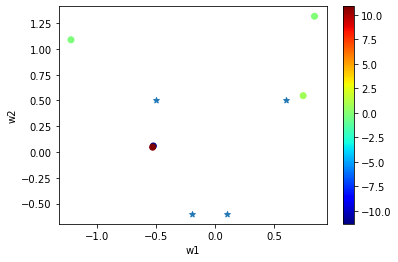

In [21]:
plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")

plt.scatter(incoming_weights_x,
            incoming_weights_y,
            c = outgoing_weights,
            cmap = matplotlib.cm.jet)

plt.colorbar()
plt.xlabel('w1')
plt.ylabel('w2')

In [22]:
# max_loss_data[abs(max_loss_data['w31'] - teacher_neurons_x[0]) == min(abs(max_loss_data['w31'] - teacher_neurons_x[0]) )]
# sample_point = max_loss_data[max_loss_data['smallest_heg'] == min(abs(max_loss_data['smallest_heg']))]

In [23]:


# for index, row in max_loss_data.iterrows():
#   incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(row)

#   plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")
#   plt.scatter(incoming_weights_x,
#             incoming_weights_y,
#             c = outgoing_weights,
#             cmap = matplotlib.cm.jet)

#   plt.colorbar()
#   plt.xlabel('w1')
#   plt.ylabel('w2')


## Pytorch-based eigenvalue computation

In [24]:
w_in = torch.DoubleTensor([[incoming_weights_x[0], incoming_weights_y[0]],
                           [incoming_weights_x[1], incoming_weights_y[1]],
                           [incoming_weights_x[2], incoming_weights_y[2]],
                           [incoming_weights_x[3], incoming_weights_y[3]],
                           [incoming_weights_x[4], incoming_weights_y[4]]])
w_out = torch.DoubleTensor([outgoing_weights])
dummy_model = DummyNetwork(D_in, H_student, D_out, w_in, w_out)
loss_grad = torch.autograd.grad(nn.MSELoss()(dummy_model(dataset), y_labels), dummy_model.parameters(), create_graph=True)
grad_norm, hessian = eval_hessian(loss_grad, dummy_model)
smallest_eigenvalue = np.min(np.linalg.eigvals(hessian))

print('loss at the end: ', nn.MSELoss()(dummy_model(dataset), y_labels))
print('gradient norm at the end: ', grad_norm)
print('smallest eigenvalue at the end: ', smallest_eigenvalue)

loss at the end:  tensor(8.2961e-05, grad_fn=<MseLossBackward0>)
gradient norm at the end:  5.54564355228769e-10
smallest eigenvalue at the end:  7.707873871300661e-11


## Smallest eigenvalue using JAX

In [25]:
import jax.numpy as jnp
from jax import nn as jax_nn
from jax.config import config; config.update("jax_enable_x64", True)
jnp.set_printoptions(precision=32)

jnp_inputs = jnp.array(construct_dataset(), dtype=jnp.float64)
jnp_labels = jnp.array(teacher_model(dataset).detach(), dtype=jnp.float64)

def predict(w_in, w_out):
  return w_out @ jnp.transpose(jax_nn.sigmoid(jnp_inputs @ jnp.transpose(w_in)))

w_in = jnp.array([[incoming_weights_x[0], incoming_weights_y[0]],
                  [incoming_weights_x[1], incoming_weights_y[1]],
                  [incoming_weights_x[2], incoming_weights_y[2]],
                  [incoming_weights_x[3], incoming_weights_y[3]],
                  [incoming_weights_x[4], incoming_weights_y[4]]], dtype=jnp.float64)
w_out = jnp.array(outgoing_weights, dtype=jnp.float64)

### Loss in JAX

Loss of the network computed in JAX.

In [26]:
def loss(w):
  w_in = w[0 : 2 * H_student].reshape(D_in, H_student).T
  w_out = w[2 * H_student : ].reshape(1, H_student)
  preds = predict(w_in, w_out).T
  return jnp.mean(jnp.mean(jnp.square(preds - jnp_labels)))
print(loss(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))))

8.296136315843013e-05


### Hessian in JAX

In [27]:
from jax import jacfwd, jacrev
import jax

def hessian(f):
    return jacfwd(jacrev(f))

H = hessian(loss)(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))

### Eigenvalues in JAX

In [28]:
evals, evectors = jnp.linalg.eig(H)

# Sanity check
for eval in jnp.array([jax.lax.imag(eval) for eval in evals]):
  assert eval == 0

evals = jnp.array([jax.lax.real(eval) for eval in evals])
print(evals)
smallest_evector = jnp.array([jax.lax.real(elem) for elem in evectors[:, jnp.argmin(evals)]])

[1.3224358381085221e+02 5.6970817732878153e+01 2.5114436717641357e+00
 1.5544081760884612e-01 7.1901991139353569e-02 1.6199973289082549e-02
 8.6182820262358777e-03 4.3257220535546032e-03 2.6664117218716185e-03
 8.7817041656811047e-04 5.0369492564762718e-04 1.6794974872358156e-04
 9.3533583100810346e-06 7.3843785835886937e-06 7.7080897604067242e-11]


## Perturbation (based on JAX evectors)

### For one random element

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'smallest eval')

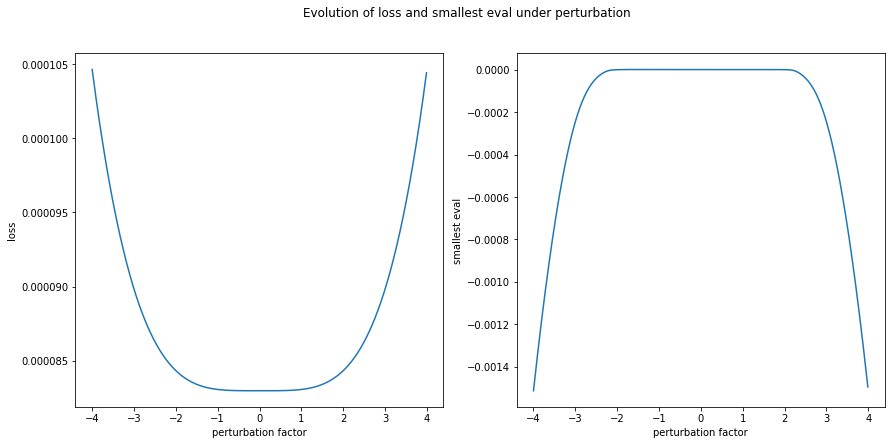

In [29]:
old_loss = loss(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))

perturb_lower_bound = -4.0
perturb_upper_bound = 4.0
perturb_step = 0.01

perturb_losses = []
perturb_evals = []

weights = jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))
for eps in np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step):
  new_weights = weights + eps * smallest_evector
  
  H = hessian(loss)(new_weights)
  H = (H + H.T) / 2
  evals, _ = jnp.linalg.eig(H)

  perturb_evals.append(min(evals))
  perturb_losses.append(loss(new_weights))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14.5, 6.5)
fig.suptitle('Evolution of loss and smallest eval under perturbation')
ax1.plot(np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step), perturb_losses)
ax1.ticklabel_format(useOffset=False)
ax1.set_xlabel('perturbation factor')
ax1.set_ylabel('loss')

ax2.plot(np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step), perturb_evals)
ax2.set_xlabel('perturbation factor')
ax2.set_ylabel('smallest eval')

### For the entire set of high loss points

In [30]:
# num_saddles = 0
# num_local_minima = 0
# num_total = len(max_loss_data)
# max_diff = -float("inf")
# max_abs_smallest_eval_arr = []

# for index, row in max_loss_data.iterrows():
#   old_loss = row['loss']
#   incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(row)

#   w_in = jnp.array([[incoming_weights_x[0], incoming_weights_y[0]],
#                   [incoming_weights_x[1], incoming_weights_y[1]],
#                   [incoming_weights_x[2], incoming_weights_y[2]],
#                   [incoming_weights_x[3], incoming_weights_y[3]],
#                   [incoming_weights_x[4], incoming_weights_y[4]]], dtype=jnp.float64)
#   w_out = jnp.array(outgoing_weights, dtype=jnp.float64)
#   weights = jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))

#   H = hessian(loss)(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))
#   H = (H + H.T) / 2
#   evals, evectors = jnp.linalg.eig(H)

#   # Sanity check
#   for eval in jnp.array([jax.lax.imag(eval) for eval in evals]):
#     assert eval == 0

#   evals = jnp.array([jax.lax.real(eval) for eval in evals])
#   smallest_evector = jnp.array([jax.lax.real(elem) for elem in evectors[:, jnp.argmin(evals)]])

#   max_abs_smallest_eval = -float("inf")

#   for eps in np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step):
#     new_weights = weights + eps * smallest_evector
#     # print(old_loss, loss(new_weights))
#     # print(old_loss - loss(new_weights) - old_loss / 100.0)
#     perturbed_H = hessian(loss)(new_weights)
#     perturbed_H = (perturbed_H + perturbed_H.T) / 2
#     perturbed_evals, _ = jnp.linalg.eig(perturbed_H)

#     max_diff = max(max_diff, old_loss - loss(new_weights))
#     max_abs_smallest_eval = max(abs(min(perturbed_evals)), max_abs_smallest_eval)
#   max_abs_smallest_eval_arr.append(max_abs_smallest_eval)

# print('max diff between the original loss and the computed loss: ', max_diff)
# print(max_abs_smallest_eval_arr)

In [31]:
# print(len(max_abs_smallest_eval_arr))